In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

most_recent_date = session.query(measurement.date).order_by(-measurement.date).first()
most_recent_date

('2017-01-01')

('2010-01-01',)
2010-12-31 00:00:00


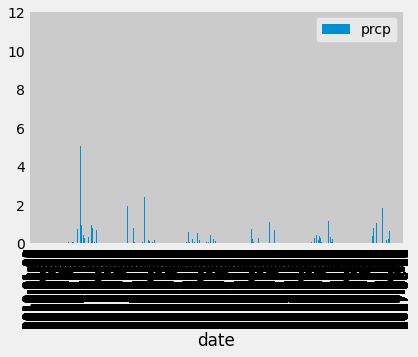

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

twelve_months = dt.datetime(2017, 1, 1) - dt.timedelta(weeks = 48)
last_12 = session.query(measurement.station, measurement.date, measurement.prcp, measurement.tobs).\
    filter(measurement.date > twelve_months).\
    order_by(measurement.date).all()
# print(last_12)

# Calculate the date one year from the last date in data set.

last_date = session.query(measurement.date).order_by(measurement.date).first()
print(last_date)

one_year =  dt.datetime(2010, 1, 1) + dt.timedelta(weeks=52)

print(one_year)

# Perform a query to retrieve the data and precipitation scores

prcp = session.query(measurement.date, measurement.prcp).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp,columns=["date", "prcp"])
prcp_df.set_index("date", inplace=True)
prcp_df.head()
# Sort the dataframe by date

prcp_df = prcp_df.sort_values("date")

prcp_df.head()
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot.bar()
plt.xticks(rotation=90)

plt.show()



In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.station).count()

station_count

9

In [59]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(-func.count(measurement.station)).all()
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
waihee = session.query(func.min(measurement.tobs).label("min_temp"), \
                       func.max(measurement.tobs).label("max_temp"),\
                       func.avg(measurement.tobs).label("avg_temp")).\
    filter(measurement.station == "USC00519281")

waihee

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date_waihee = session.query(measurement.date).\
    filter(measurement.station == "USC00519281").\
    order_by(-measurement.date).first()
most_recent_date_waihee

('2017-01-01')

In [68]:
twelve_months_waihee = dt.datetime(2017, 1, 1) - dt.timedelta(weeks = 48)
last_12_waihee = session.query(measurement.tobs).\
    filter(measurement.date > twelve_months_waihee, measurement.station == "USC00519281").\
    order_by(measurement.date).all()
print(last_12_waihee)

[(69.0,), (68.0,), (69.0,), (65.0,), (67.0,), (69.0,), (70.0,), (56.0,), (57.0,), (58.0,), (61.0,), (71.0,), (74.0,), (71.0,), (75.0,), (72.0,), (71.0,), (72.0,), (69.0,), (71.0,), (72.0,), (60.0,), (69.0,), (67.0,), (64.0,), (69.0,), (69.0,), (71.0,), (69.0,), (72.0,), (63.0,), (63.0,), (62.0,), (70.0,), (72.0,), (67.0,), (74.0,), (66.0,), (68.0,), (68.0,), (72.0,), (72.0,), (71.0,), (70.0,), (68.0,), (68.0,), (68.0,), (68.0,), (71.0,), (66.0,), (65.0,), (63.0,), (64.0,), (72.0,), (76.0,), (76.0,), (73.0,), (72.0,), (62.0,), (65.0,), (68.0,), (74.0,), (74.0,), (74.0,), (65.0,), (69.0,), (65.0,), (68.0,), (74.0,), (70.0,), (71.0,), (74.0,), (75.0,), (73.0,), (74.0,), (76.0,), (71.0,), (68.0,), (67.0,), (72.0,), (73.0,), (73.0,), (75.0,), (75.0,), (74.0,), (74.0,), (74.0,), (73.0,), (74.0,), (74.0,), (75.0,), (73.0,), (74.0,), (72.0,), (68.0,), (66.0,), (69.0,), (67.0,), (68.0,), (68.0,), (67.0,), (65.0,), (68.0,), (70.0,), (76.0,), (75.0,), (75.0,), (72.0,), (75.0,), (72.0,), (76.0,), 

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([56. , 58.7, 61.4, 64.1, 66.8, 69.5, 72.2, 74.9, 77.6, 80.3, 83. ]),
 <a list of 556 Lists of Patches objects>)

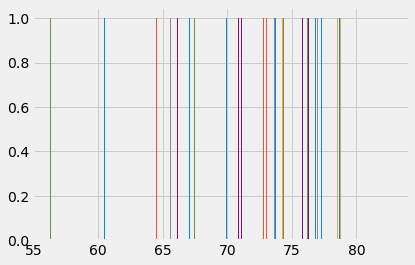

In [71]:
tobs_df = pd.DataFrame(last_12_waihee)
plt.hist(tobs_df)

# Close session

In [ ]:
# Close Session
session.close()